<a href="https://colab.research.google.com/github/dspark0419/DATA-205/blob/main/Project_Crime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import/Upgrade Libraries**

In [1]:
!python --version

Python 3.7.10


In [2]:
# hide outputs
%%capture
!pip install --upgrade numpy
!pip install --upgrade pandas
!pip install --upgrade matplotlib
!pip install --upgrade seaborn
!pip install --upgrade scipy
!pip install --upgrade math

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy import random
from math import sqrt

In [4]:
%%capture
!pip install --upgrade json
!pip install --upgrade requests

import json
import requests

In [5]:
%%capture
!pip install --upgrade geopandas
!pip install --upgrade shapely
!pip install --upgrade adjustText

import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point, shape
import adjustText as aT

In [6]:
%%capture
!pip install --upgrade plotly

import plotly.express as px
import plotly.graph_objects as go

In [7]:
%%capture
!pip install --upgrade jupyter-dash

from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output, State

# **MC Zip Map**

In [8]:
# Below is from the notebook Project_Choropleth_ZipPop.ipynb
mcZip_multiPoly = gpd.read_file('mcZip_multiPoly.shp')

Create a geojson file for the data mcZip_multiPoly

In [9]:
mcZip_multiPoly.to_file(filename='mcZip_multiPoly_geoj.geojson', driver ='GeoJSON')

In [10]:
with open('mcZip_multiPoly_geoj.geojson') as file:
  mcZip_multiPoly_geoj = json.load(file)

Compute representative points for zip codes

In [11]:
mcZip_multiPoly['center'] = mcZip_multiPoly['geometry'].representative_point()

# **MC Census Data: mcPop**

In [12]:
# Below is from the notebook Project_Map_ZipPop.ipynb
mcPop = pd.read_csv('mcPop.csv')
mcPop.head()

Unnamed: 0  Zip Code  AREALAND  ...  Pop 65+  PCTPOP65_    Shape_Area
0          62     20707  28896187  ...     2998        9.5  4.827461e+07
1         102     20777  19568844  ...      428       12.9  3.274726e+07
2         111     20812    496734  ...       33       12.9  1.437529e+06
3         112     20814  13166146  ...     4508       16.3  2.192136e+07
4         113     20815  14066048  ...     6002       20.6  2.337013e+07

[5 rows x 25 columns]

Drop unnamed columns

In [13]:
mcPop = mcPop.loc[:, ~mcPop.columns.str.contains('^Unnamed')]

In [14]:
mcPop.head()

Zip Code  AREALAND  AREAWATR  ...  Pop 65+  PCTPOP65_    Shape_Area
0     20707  28896187    481328  ...     2998        9.5  4.827461e+07
1     20777  19568844    110664  ...      428       12.9  3.274726e+07
2     20812    496734    371058  ...       33       12.9  1.437529e+06
3     20814  13166146     52953  ...     4508       16.3  2.192136e+07
4     20815  14066048     35097  ...     6002       20.6  2.337013e+07

[5 rows x 24 columns]

In [15]:
std_zip = mcPop['Zip Code'].unique()

# **MC Crime: Dataset Wrangling**

In [16]:
#crime_json = requests.get('https://data.montgomerycountymd.gov/resource/icn6-v9z3.json')
#crime_0 = pd.DataFrame(crime_json.json())

data source: https://data.montgomerycountymd.gov/Public-Safety/Crime/icn6-v9z3/data

In [17]:
crime_0 = pd.read_csv('Crime.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,18) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [18]:
crime_0.shape

(247705, 30)

In [19]:
crime_0.columns

Index(['Incident ID', 'Offence Code', 'CR Number', 'Dispatch Date / Time',
       'NIBRS Code', 'Victims', 'Crime Name1', 'Crime Name2', 'Crime Name3',
       'Police District Name', 'Block Address', 'City', 'State', 'Zip Code',
       'Agency', 'Place', 'Sector', 'Beat', 'PRA', 'Address Number',
       'Street Prefix', 'Street Name', 'Street Suffix', 'Street Type',
       'Start_Date_Time', 'End_Date_Time', 'Latitude', 'Longitude',
       'Police District Number', 'Location'],
      dtype='object')

In [20]:
crime_0.duplicated().sum()

0

In [21]:
crime_col = ['Victims', 'Crime Name1', 'Crime Name2', 'Crime Name3', 'Zip Code', 'Start_Date_Time']
crime_sel = crime_0[crime_col]

In [22]:
crime_sel['Year'] = pd.to_datetime(crime_sel['Start_Date_Time']).dt.year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
crime_sel['Year'].unique()

array([2020, 2018, 2019, 2017, 2016, 2021])

In [24]:
crime_sel.isnull().sum()

Victims               0
Crime Name1         190
Crime Name2         190
Crime Name3         190
Zip Code           3197
Start_Date_Time       0
Year                  0
dtype: int64

In [25]:
crime_sel = crime_sel.dropna()

In [26]:
crime_sel.shape

(244318, 7)

In [27]:
crime_sel['Zip Code'].nunique()

179

In [28]:
mcCrime = crime_sel[crime_sel['Zip Code'].isin(std_zip)]

In [29]:
mcCrime['Zip Code'].unique() # zip code 21770 missing, but negligible

array([20816., 20872., 20876., 20850., 20860., 20878., 20854., 20874.,
       20895., 20902., 20877., 20886., 20879., 20906., 20851., 20904.,
       20852., 20910., 20912., 20901., 20814., 20871., 20905., 20815.,
       20903., 20817., 20866., 20855., 20853., 20832., 20837., 20882.,
       20833., 20818., 20841., 20861., 20842., 20868., 20707., 21771.,
       20812., 20862., 20838., 20777., 20839., 21797.])

In [30]:
mcCrime['Zip Code'] = mcCrime['Zip Code'].astype('int')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
mcCrime.head()

Victims             Crime Name1  ...         Start_Date_Time  Year
0        1  Crime Against Property  ...  03/18/2020 09:00:00 PM  2020
1        1                   Other  ...  03/19/2020 01:00:00 PM  2020
2        1  Crime Against Property  ...  08/19/2020 06:30:00 PM  2020
3        1  Crime Against Property  ...  02/01/2020 05:03:00 PM  2020
4        1  Crime Against Property  ...  11/02/2018 03:34:00 PM  2018

[5 rows x 7 columns]

In [32]:
mcCrime[mcCrime['Crime Name1'] == 'Not a Crime']['Crime Name2'].unique()

array(['Runaway'], dtype=object)

In [33]:
mcCrime[mcCrime['Crime Name1'] == 'Not a Crime']['Crime Name3'].unique()

array(['JUVENILE - RUNAWAY'], dtype=object)

In [34]:
mcCrime[(mcCrime['Year']==2016 | 2019 | 2021) & (mcCrime['Zip Code']==20777)]

Empty DataFrame
Columns: [Victims, Crime Name1, Crime Name2, Crime Name3, Zip Code, Start_Date_Time, Year]
Index: []

In [35]:
mcCrime[(mcCrime['Year']==2021) & (mcCrime['Zip Code']==20707)]

Victims             Crime Name1  ...         Start_Date_Time  Year
244978        1  Crime Against Property  ...  04/28/2021 02:38:00 AM  2021

[1 rows x 7 columns]

Add rows with zero victims to the zip codes that have no rows of years

In [36]:
new_20777_2016 = {'Victims': 0, 'Crime Name1': 'Other',	'Crime Name2': 'All Other Offenses',
                  'Crime Name3': 'OBSCENE COMMUNICATION',	'Zip Code': 20777, 
                  'Start_Date_Time': '01/01/2016 12:00:00 AM', 'Year': 2016}
new_20777_2019 = {'Victims': 0, 'Crime Name1': 'Other',	'Crime Name2': 'All Other Offenses',
                  'Crime Name3': 'OBSCENE COMMUNICATION',	'Zip Code': 20777, 
                  'Start_Date_Time': '01/01/2019 12:00:00 AM', 'Year': 2019}
new_20707_2021 = {'Victims': 0, 'Crime Name1': 'Other',	'Crime Name2': 'All Other Offenses',
                  'Crime Name3': 'OBSCENE COMMUNICATION',	'Zip Code': 20707, 
                  'Start_Date_Time': '01/01/2021 12:00:00 AM', 'Year': 2021}
new_20777_2021 = {'Victims': 0, 'Crime Name1': 'Other',	'Crime Name2': 'All Other Offenses',
                  'Crime Name3': 'OBSCENE COMMUNICATION',	'Zip Code': 20777, 
                  'Start_Date_Time': '01/01/2021 12:00:00 AM', 'Year': 2021}
mcCrime = mcCrime.append([new_20777_2016, new_20777_2019, new_20707_2021, new_20777_2021], ignore_index=True)
#mcCrime = mcCrime.append(new_20777_2019, ignore_index=True)

In [37]:
mcCrime.to_csv('mcCrime.csv')

# **Data Visualizations**

In [38]:
plt.rcParams['figure.figsize'] = (15, 6) # global fugure size

## **MC Crime**

In [39]:
by_col = ['Crime Name1', 'Crime Name2', 'Crime Name3', 'Zip Code', 'Year']
mcCrime_byCol = mcCrime.groupby(by_col)['Victims'].sum().reset_index()

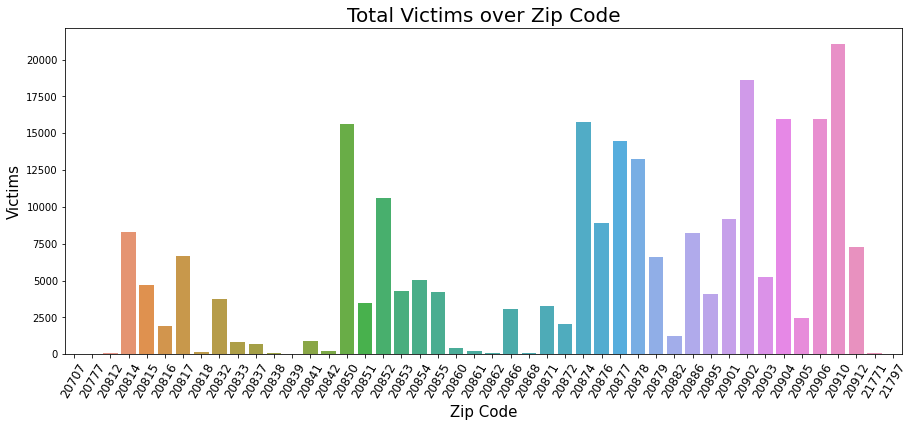

In [40]:
sns.barplot(data=mcCrime_byCol, x='Zip Code', y='Victims', ci=None, estimator=sum)

plt.title('Total Victims over Zip Code', size=20)
plt.xticks(rotation=60, size=12)
plt.xlabel('Zip Code', size=15)
plt.ylabel('Victims', size=15)

plt.show()

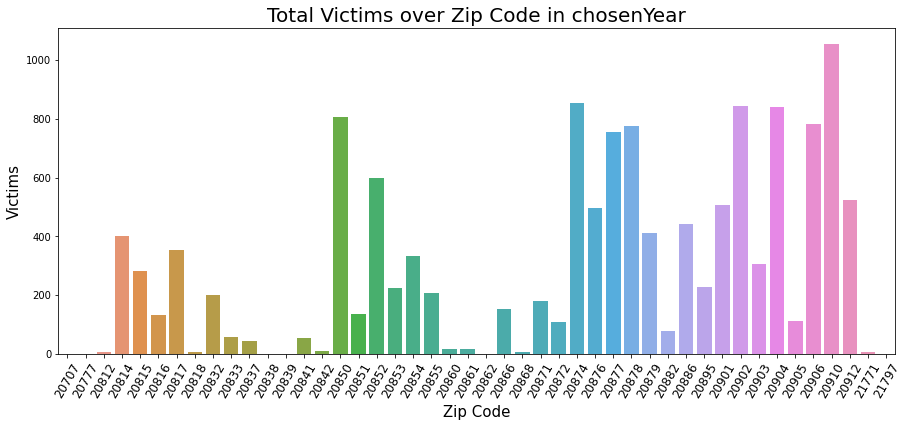

In [41]:
chosenYear = 2021
mcCrime_byCol_Year = mcCrime_byCol[mcCrime_byCol['Year'] == chosenYear]

sns.barplot(data=mcCrime_byCol_Year, x='Zip Code', y='Victims', estimator=sum, ci=None)

plt.title('Total Victims over Zip Code in chosenYear', size=20)
plt.xticks(rotation=60, size=12)
plt.xlabel('Zip Code', size=15)
plt.ylabel('Victims', size=15)

plt.show()

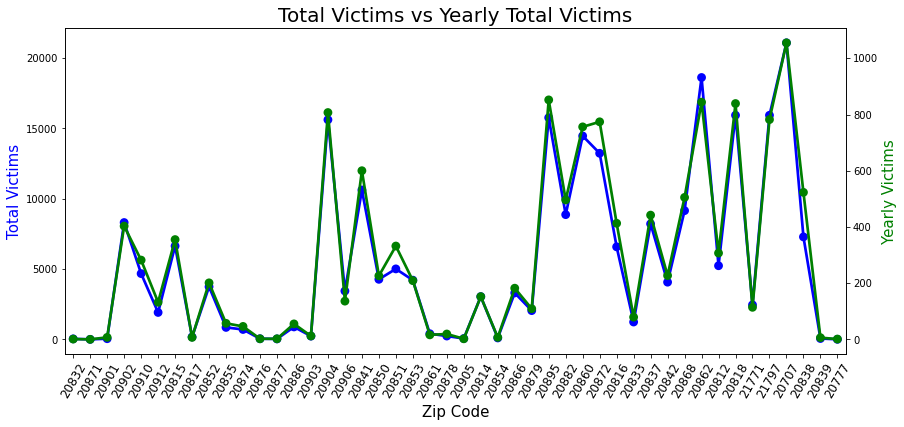

In [42]:
fig, ax = plt.subplots(figsize=[14,6])

sns.pointplot(ax=ax, data=mcCrime_byCol, x='Zip Code', y='Victims', color='blue', ci=None, estimator=sum)
ax1 = ax.twinx()
sns.pointplot(ax=ax1, data=mcCrime_byCol_Year, x='Zip Code', y='Victims', color='green', ci=None, estimator=sum)

ax.set_title('Total Victims vs Yearly Total Victims', size=20)
#ax.set_xticks()
ax.set_xticklabels(mcCrime_byCol_Year['Zip Code'].unique(), rotation=60, size=12) #ax.get_xticklabels()
ax.set_xlabel('Zip Code', size=15)
ax.set_ylabel('Total Victims', size=15, color='blue')
ax1.set_ylabel('Yearly Victims', size=15, color='green')

plt.show()

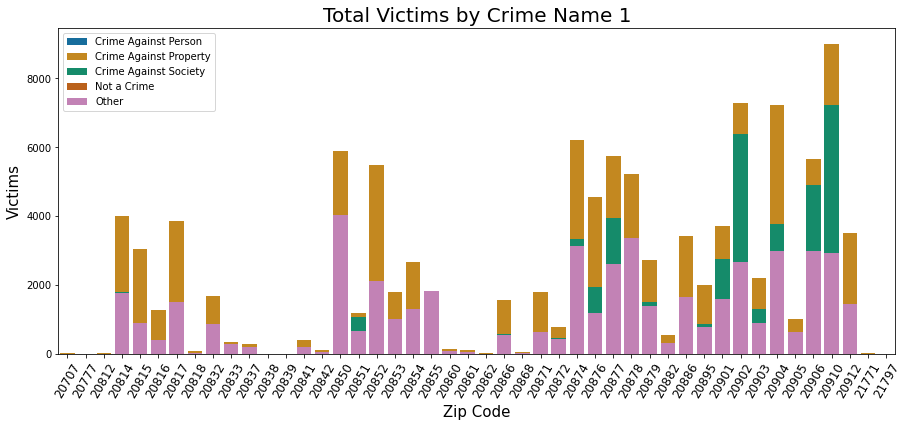

In [43]:
sns.barplot(data=mcCrime_byCol, x='Zip Code', y='Victims', hue='Crime Name1', palette='colorblind',
            dodge=False, orient='v', ci=None, estimator=sum)

plt.title('Total Victims by Crime Name 1', size=20)
plt.xticks(rotation=60, size=12)
plt.xlabel('Zip Code', size=15)
plt.ylabel('Victims', size=15)
plt.legend(loc='upper left')
plt.show()

In [44]:
x_array = np.sort(mcCrime_byCol['Zip Code'].unique())

fig =px.bar(mcCrime_byCol, x='Zip Code', y='Victims', color='Crime Name1', barmode='stack',
            color_continuous_scale=px.colors.sequential.Greens) # labels={'Zip Code': 'Zip Code'} same as xaxis title below

fig.update_xaxes(type='category', title='Zip Code', categoryorder='array', categoryarray=x_array, 
                 tickangle=-60, tickfont_size=11) # categoryorder='total descending' to display bars in descending order

fig.update_layout(font_color='black', paper_bgcolor='lightgrey', plot_bgcolor='white')

fig.update_layout(title_text='Total Victims by Crime Name 1', title_x=0.5, title_y=0.95,
                  title_font_color='green', title_font_size=22)

fig.update_layout(legend_x=0.01, legend_y=0.99, legend_bgcolor='lightgrey') # showlegend=False, legend_font_size=10

fig.update_traces(marker_line_width=0) # remove horizontal white lines on stacked bars
fig.show()

## **MC Population and Crime**

In [45]:
mcPopCrime = mcPop.merge(mcCrime, on='Zip Code')#.drop(columns=['Zip Code'])

In [46]:
summaries = {'Victims': 'sum', 'Population': 'mean'}
mcPopCrime_byZip = mcPopCrime.groupby('Zip Code').agg(summaries).reset_index()

In [47]:
mcPopCrime_byZip = mcPopCrime_byZip.sort_values('Zip Code')

Population and Crime

In [48]:
x_array = np.sort(mcPopCrime_byZip['Zip Code'].unique())

fig =px.line(x=mcPopCrime_byZip['Zip Code'], y=mcPopCrime_byZip['Victims'], 
             color=px.Constant('Victims'), color_discrete_map={'Victims': 'blue'})
fig.add_bar(x=mcPopCrime_byZip['Zip Code'], y=mcPopCrime_byZip['Population'], name='Population')
# fig.add_hline(y=np.mean(mcPopCrime_byZip['Victims']/mcPopCrime_byZip['Population']*10000), 
#               name='Average Victim per 10k', line_color='purple')
# fig.add_hline(y=np.mean(mcPopCrime_byZip['Victims']), name='Average Victim', line_color='green')

fig.update_xaxes(type='category', title='Zip Code', categoryorder='array', categoryarray=x_array, 
                 tickangle=90, tickfont_size=11)
fig.update_layout(font_color='black', paper_bgcolor='lightgrey', plot_bgcolor='white')
fig.update_traces(marker_color='coral')
fig.update_layout(title_text='Victims vs Population', title_x=0.5, title_y=0.95,
                  title_font_color='green', title_font_size=22)
fig.update_layout(legend_x=0.01, legend_y=0.99, legend_bgcolor='lightgrey')
fig.show()

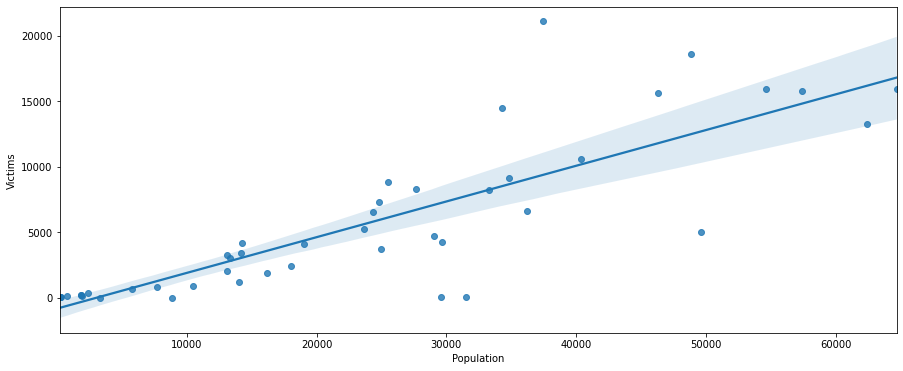

In [49]:
sns.regplot(data=mcPopCrime_byZip, x='Population', y='Victims')
plt.show()

In [50]:
mcPopCrime_byZip['Population'].corr(mcPopCrime_byZip['Victims'])

0.8386103001190784

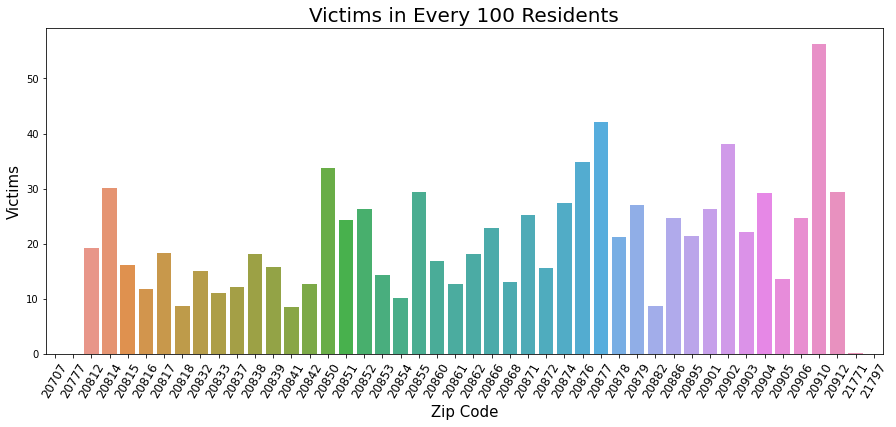

In [51]:
sns.barplot(data=mcPopCrime_byZip, x='Zip Code', y=mcPopCrime_byZip['Victims']/mcPopCrime_byZip['Population']*100, 
            ci=None, estimator=sum)

plt.title('Victims in Every 100 Residents', size=20)
plt.xticks(rotation=60, size=12)
plt.xlabel('Zip Code', size=15)
plt.ylabel('Victims', size=15)

plt.show()

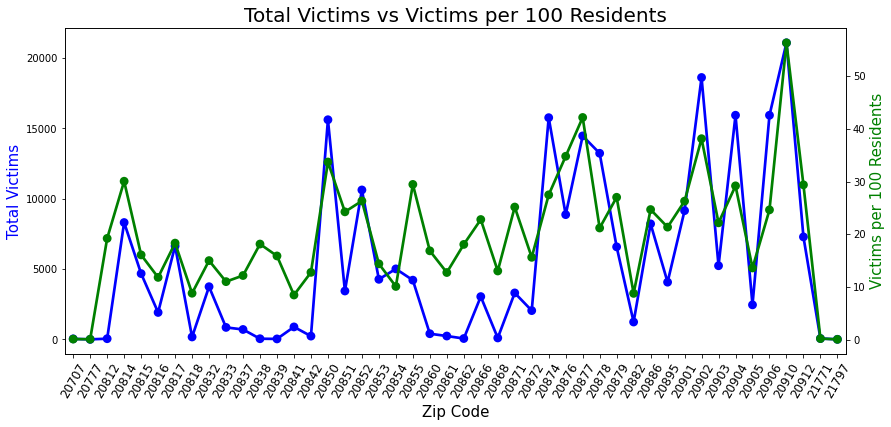

In [52]:
fig, ax = plt.subplots(figsize=[14,6])

sns.pointplot(ax=ax, data=mcPopCrime_byZip, x='Zip Code', y='Victims', color='blue', ci=None, estimator=sum)
ax1 = ax.twinx()
sns.pointplot(ax=ax1, data=mcPopCrime_byZip, x='Zip Code', 
              y=mcPopCrime_byZip['Victims']/mcPopCrime_byZip['Population']*100, color='green',
              ci=None, estimator=sum)

ax.set_title('Total Victims vs Victims per 100 Residents', size=20)
#ax.set_xticks()
ax.set_xticklabels(mcPopCrime_byZip['Zip Code'].unique(), rotation=60, size=12) #ax.get_xticklabels()
ax.set_xlabel('Zip Code', size=15)
ax.set_ylabel('Total Victims', size=15, color='blue')
ax1.set_ylabel('Victims per 100 Residents', size=15, color='green')

plt.show()

In [53]:
x_array = np.sort(mcPopCrime_byZip['Zip Code'].unique())

fig =px.line(x=mcPopCrime_byZip['Zip Code'], y=mcPopCrime_byZip['Victims']/mcPopCrime_byZip['Population']*10000, 
             color=px.Constant('Victims per 10k'), color_discrete_map={'Victims per 10k': 'blue'})
fig.add_bar(x=mcPopCrime_byZip['Zip Code'], y=mcPopCrime_byZip['Victims'], name='Total Victims')
fig.add_hline(y=np.mean(mcPopCrime_byZip['Victims']/mcPopCrime_byZip['Population']*10000), 
              name='Average Victim per 10k', line_color='purple')
fig.add_hline(y=np.mean(mcPopCrime_byZip['Victims']), name='Average Victim', line_color='green')

fig.update_xaxes(type='category', title='Zip Code', categoryorder='array', categoryarray=x_array, 
                 tickangle=90, tickfont_size=11)
fig.update_yaxes(title='Victims', tickfont_size=11)
fig.update_layout(font_color='black', paper_bgcolor='lightgrey', plot_bgcolor='white')
fig.update_traces(marker_color='coral')
fig.update_layout(title_text='Total Victims vs Victims per 10k Residents', title_x=0.5, title_y=0.95,
                  title_font_color='green', title_font_size=22)
fig.update_layout(legend_x=0.01, legend_y=0.99, legend_bgcolor='lightgrey')
fig.show()

# **Dash for MC Crime**

## **Choropleth Mapbox**

In [54]:
mcCrime_byZip = mcCrime.groupby('Zip Code')['Victims'].sum().reset_index()

In [55]:
from getpass import getpass
project_token = getpass('Enter your Mapbox token: ')

Enter your Mapbox token: ··········


Color scale for Total Victims

In [56]:
fig = px.choropleth_mapbox(mcCrime_byZip,
                           geojson=mcZip_multiPoly_geoj,
                           featureidkey='properties.ZIPCODE',
                           locations='Zip Code',
                           color='Victims',
                           #mapbox_style='carto-positron',
                           color_continuous_scale='viridis',
                           center={'lon': -77.195434, 'lat': 39.139551},
                           zoom=9,
                           opacity=0.7,
                           hover_data=['Zip Code', 'Victims'],
                           labels={'Zip Code':'Zip Code'}
                           )

fig.add_trace(go.Scattermapbox(lon=mcZip_multiPoly.center.x,
                               lat=mcZip_multiPoly.center.y,
                               mode='markers+text',
                               marker=dict(size=6, color='black', opacity=0.7),
                               text=mcZip_multiPoly.ZIPCODE.unique().tolist(),
                               textposition='top center',
                               textfont=dict(size=10, color='black'),
                               hoverinfo='skip',
                               ))

fig.update_layout(mapbox_style='streets', mapbox_accesstoken=project_token)
# "basic", "streets", "outdoors", "light", "dark", "satellite", or "satellite-streets"
fig.update_layout(margin={"r":9,"t":9,"l":9,"b":9})

fig.show()

Color scale for Victims per 10k Residents

In [57]:
fig = px.choropleth_mapbox(mcPopCrime_byZip,
                           geojson=mcZip_multiPoly_geoj,
                           featureidkey='properties.ZIPCODE',
                           locations='Zip Code',
                           color=mcPopCrime_byZip['Victims']/mcPopCrime_byZip['Population']*10000,
                           #mapbox_style='carto-positron',
                           color_continuous_scale='viridis',
                           center={'lon': -77.195434, 'lat': 39.139551},
                           zoom=9,
                           opacity=0.7,
                           hover_data=['Zip Code', 'Victims'],
                           labels={'Zip Code':'Zip Code'}
                           )

fig.add_trace(go.Scattermapbox(lon=mcZip_multiPoly.center.x,
                               lat=mcZip_multiPoly.center.y,
                               mode='markers+text',
                               marker=dict(size=6, color='black', opacity=0.7),
                               text=mcZip_multiPoly.ZIPCODE.unique().tolist(),
                               textposition='top center',
                               textfont=dict(size=10, color='black'),
                               hoverinfo='skip',
                               ))

fig.update_layout(mapbox_style='streets', mapbox_accesstoken=project_token)
# "basic", "streets", "outdoors", "light", "dark", "satellite", or "satellite-streets"
fig.update_layout(margin={"r":9,"t":9,"l":9,"b":9})

fig.show()

## **Dash**

In [58]:
app = JupyterDash(__name__)

app.layout = html.Div(#
    [
     html.H1('MC Crime (2016 ~)',
             style={'textAlign': 'center', 'color': 'black', 'backgroundColor': 'grey'}
             ),
     
     html.Div(# B1
         [
          html.Div(# b1
              [
               html.Label(['Colorscale',
                           dcc.Dropdown(id='crime-colorscale',
                                        options=[{'label': i, 'value': i} for i in ['Victims']],
                                        value='Victims',
                                        clearable=False,
                                        ),
                           ]),
               ],
               style={'width': '40%', 'display': 'inline-block', 'color': 'blue', 'fontWeight': 'bold',
                      'margin-bottom': '1em'}
                   ),# e1
          
          dcc.Graph(id='crime-choropleth'),
          ],
          style={'width': '45%', 'display': 'inline-block', 'margin-left': '2em', 'margin-right': '1em'}
          ),# E1
     
     html.Div(# B2
         [
          html.Div(# b2
              [
               html.Div(# bb2_1
                   [
                    html.Label(['Bargraph/Piechart',
                                dcc.Dropdown(id='crime-barpie-drop',
                                        options=[{'label': i, 'value': i} for i in ['Victims', 'Crime Names']],
                                        value='Victims',
                                        #placeholder='Select',
                                        clearable=False,
                                        #style={'color': 'green'},
                                        ),
                               ]),
                    ],
                    style={'width': '30%', 'display': 'inline-block', 'margin-bottom': '1em'}
                    ),# ee2_1
               
               html.Div(# bb2_2
                   [
                    html.Div(id='crime-radio-container', children=
                             [
                              dcc.RadioItems(id='crime-barpie-radio',
                                               options=[],
                                               style={'color': 'navy'},
                                               ),
                               ]
                             ),
                    
                    html.Div(id='crime-slide-container', children=
                             [
                              dcc.Slider(id='crime-year-slide',
                                         min=mcCrime['Year'].min(),
                                         max=mcCrime['Year'].max(),
                                         value=mcCrime['Year'].min(),
                                         marks={str(year): str(year) for year in mcCrime['Year'].unique()},
                                         step=None,
                                         )
                              ],
                             style= {'display': 'block'} # will be changed by the slide callback to show/hide
                             ),
                    
                    html.Div(id='crime-info-container', children=
                             [
                              dcc.Markdown('''Click over Regions on Map''')
                              ],
                             style= {'display': 'block'} # will be changed by the slide callback to show/hide
                             ),
                    ],
                    style={'width': '55%', 'display': 'inline-block', 'margin-left': '2em'}
                    ),# ee2_2
               ],
               style={'width': '98%', 'display': 'inline-block', 'color': 'green', 'fontWeight': 'bold',
                      'margin-left': '3em', 'display': 'flex'} # flex: side by side display of two controls
                   ),# e2
          
          dcc.Graph(id='crime-barpie'),
          ],
          style={'float': 'right', 'width': '48%', 'display': 'inline-block', 'margin-right': '2em'},
        ),# E2
     ])#
    
# options in RadioItems
@app.callback(Output('crime-barpie-radio', 'options'),
              Input('crime-barpie-drop', 'value'))
def set_Radio_options(drop_value):
    barpie_victim = ['Total Victims', 'Yearly Victims']
    barpie_name = ['Crime Name1', 'Crime Name2', 'Crime Name3']
    radio_options = {'Victims': barpie_victim, 'Crime Names': barpie_name}
    return [{'label': i, 'value': i} for i in radio_options[drop_value]]

# values in the Radio options above 
@app.callback(Output('crime-barpie-radio', 'value'),
              Input('crime-barpie-radio', 'options'))
def set_Radio_value(radio_options):
    return radio_options[0]['value']

# show/hide Slider
@app.callback(
    Output(component_id='crime-slide-container', component_property='style'),
    [Input(component_id='crime-barpie-radio', component_property='value')])
def show_hide_element(radio_value):
    if radio_value == 'Yearly Victims':
        return {'display': 'block'}
    else:
        return {'display': 'none'}

# show/hide Info for Crime Names
@app.callback(
    Output(component_id='crime-info-container', component_property='style'),
    [Input(component_id='crime-barpie-drop', component_property='value')])
def show_hide_element(drop_value):
    if drop_value == 'Crime Names':
        return {'display': 'block'}
    else:
        return {'display': 'none'}

# choropleth maps for hover info                        
@app.callback(Output('crime-choropleth', 'figure'),
              Input('crime-colorscale', 'value'))
def update_figure(color_value):
    fig1 = px.choropleth_mapbox(mcCrime_byZip,
                           geojson=mcZip_multiPoly_geoj,
                           featureidkey='properties.ZIPCODE',
                           locations='Zip Code',
                           color=mcCrime_byZip[color_value],
                           color_continuous_scale='viridis',
                           center={'lon': -77.195434, 'lat': 39.139551},
                           zoom=8.9,
                           opacity=0.7,
                           hover_data=['Zip Code', 'Victims'],
                           custom_data=['Zip Code', 'Victims'])
    fig1.add_trace(go.Scattermapbox(lon=mcZip_multiPoly.center.x,
                               lat=mcZip_multiPoly.center.y,
                               mode='markers+text',
                               marker=dict(size=5, color='black', opacity=0.7),
                               text=mcZip_multiPoly.ZIPCODE.unique().tolist(),
                               textposition='top center',
                               textfont=dict(size=10, color='black'),
                               hoverinfo='skip',
                               ))
    fig1.update_layout(title_text='<b>MC {} by Zip Codes</b>'.format(color_value), title_x=0, title_y=0.99,
                     title_font_color='navy', title_font_size=15)
    fig1.update_layout(mapbox_style='streets', mapbox_accesstoken=project_token)
    fig1.update_layout(transition_duration=10, height=400, margin=dict(l=0, r=0, t=20, b=0))
    return fig1

# bargraphs/piecharts: update graphs for hover info
@app.callback(Output('crime-barpie', 'figure'),
              [Input('crime-colorscale', 'value'), Input('crime-barpie-drop', 'value'),
               Input('crime-barpie-radio', 'value'), Input('crime-year-slide', 'value'),
               Input('crime-choropleth', 'clickData')])
def update_figure(color_value, drop_value, radio_value, slide_value, click_data):
  if drop_value == 'Victims' or click_data == None:
      if radio_value == 'Total Victims':
        fig2 = px.line(x=mcPopCrime_byZip['Zip Code'],
                       y=mcPopCrime_byZip[drop_value]/mcPopCrime_byZip['Population']*10000, 
                       color=px.Constant('Victims per 10k'),
                       labels={'x': 'Zip Code', 'y': 'Victims per 10k'})
        fig2.add_bar(x=mcPopCrime_byZip['Zip Code'], y=mcPopCrime_byZip[drop_value], name='Total Victims',)
        fig2.update_xaxes(title='Zip Code')
        fig2.update_yaxes(title='Victims')
        fig2.update_layout(legend_x=0.005, legend_y=0.99, legend_bgcolor='lightgrey')
        fig2.update_layout(title_text='<b>Total Victims vs Victims per 10k Residents</b>',
                           title_x=0.08, title_y=0.99, title_font_color='navy', title_font_size=15)
      else: # Yearly Victims
        crime_year = mcCrime[mcCrime['Year'] == slide_value]
        crime_year_byZip = crime_year.groupby('Zip Code')['Victims'].sum().reset_index()
        fig2 = px.bar(crime_year_byZip, x='Zip Code', y='Victims')
        fig2.update_layout(title_text='<b>Victims in {}</b>'.format(slide_value), title_x=0.08, title_y=0.99,
                           title_font_color='navy', title_font_size=15)

      fig2.update_xaxes(type='category', tickfont_size=11) # tickangle=90
      fig2.update_layout(height=400, margin=dict(l=0, r=0, t=20, b=0))
      return fig2

  else: # for drop_value = Crime Names
      crime_zip = mcCrime[mcCrime['Zip Code'] == click_data['points'][0]['customdata'][0]]
      if radio_value == 'Crime Name1':
        crime_zip_name1 = crime_zip.loc[:, crime_zip.columns.isin(['Victims', radio_value])]
        crime_zip_name1_byValue = crime_zip_name1.groupby(radio_value)['Victims'].sum().reset_index()
        fig2 = px.pie(crime_zip_name1_byValue, values='Victims', names=radio_value,
                    color=radio_value, hole=0.4,
                    color_discrete_map={'Crime Against Person': 'blue', 'Crime Against Property': 'red',
                                'Crime Against Society': 'green', 'Not a Crime': 'yellow', 'Other': 'grey'})
        fig2.update_layout(legend_title_text='Zip Code: {}'.format(click_data['points'][0]['customdata'][0]))
        fig2.update_layout(title_text='<b>Victims by Crime Name1</b>', title_x=0.08, title_y=0.99,
                     title_font_color='navy', title_font_size=15)
      else:
        crime_zip_name23 = crime_zip.loc[:, crime_zip.columns.isin(['Victims', radio_value])]
        crime_zip_name23_byValue = crime_zip_name23.groupby(radio_value)['Victims'].sum().reset_index()
        fig2 = px.bar(crime_zip_name23_byValue, x=radio_value, y='Victims', log_y=True)
        fig2.update_xaxes(tickfont_size=10)
        fig2.update_layout(title_text='<b>Victims by {}</b> (log scale)'.format(radio_value), 
                           title_x=0.08, title_y=0.99, title_font_color='navy', title_font_size=15)
      
      fig2.update_layout(height=400, margin=dict(l=0, r=0, t=20, b=0))
      return fig2

if __name__ == '__main__':
  app.run_server(debug=True)

Dash app running on:


<IPython.core.display.Javascript object>